<div style="padding:20px;color:black;margin:0;font-size:280%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:450">Project Data Analyst</br>Youssef El Ayeb</div>


<div style="padding:20px;color:black;margin:0;font-size:280%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:450">Cristiano Ronaldo  </br> All Club Goals Stats</div>

# 1. Introduction

**Cristiano Ronaldo dos Santos Aveiro** is a Portuguese professional footballer who plays as a forward and captains the Portugal national team.He is currently a free agent...
 
- Current team: Portugal national football team (#7 / Forward) Trending
                                               
- Born: February 5, 1985 (age 37 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal
- Height: 1.87 m
- Partner: Georgina Rodríguez (2017–)
- Salary: 26.52 million GBP (2022)
- Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo

<img src="https://imagevars.gulfnews.com/2022/11/11/Cristiano-Ronaldo_18465bad2cc_large.jpg" alt="Markdown Monster icon" style="float: center;
margin-left: 160px" />

# 2. Data Loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("data/data.csv")

# 3. Basic Exploration

In [4]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            701 non-null    object
 1   Competition       701 non-null    object
 2   Matchday          701 non-null    object
 3   Date              701 non-null    object
 4   Venue             701 non-null    object
 5   Club              701 non-null    object
 6   Opponent          701 non-null    object
 7   Result            701 non-null    object
 8   Playing_Position  643 non-null    object
 9   Minute            701 non-null    object
 10  At_score          701 non-null    object
 11  Type              686 non-null    object
 12  Goal_assist       459 non-null    object
dtypes: object(13)
memory usage: 71.3+ KB


In [6]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,21
Competition,16
Matchday,52
Date,464
Venue,2
Club,4
Opponent,125
Result,53
Playing_Position,6
Minute,106


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,701,21,14/15,61
Competition,701,16,LaLiga,311
Matchday,701,52,Group Stage,75
Date,701,464,09-12-15,5
Venue,701,2,H,403
Club,701,4,Real Madrid,450
Opponent,701,125,Sevilla FC,27
Result,701,53,3:00,49
Playing_Position,643,5,LW,356
Minute,701,106,90,17


# 4. Data Visualization

## 4.1. Goals per competition

In [7]:
px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [8]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


## 4.2. Goals per season

In [9]:
px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

## 4.3. Goals per Clubs

In [10]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [11]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

## 4.4. Goals per playing Position

In [12]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

## 4.5. Goals per Game Minute

In [13]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

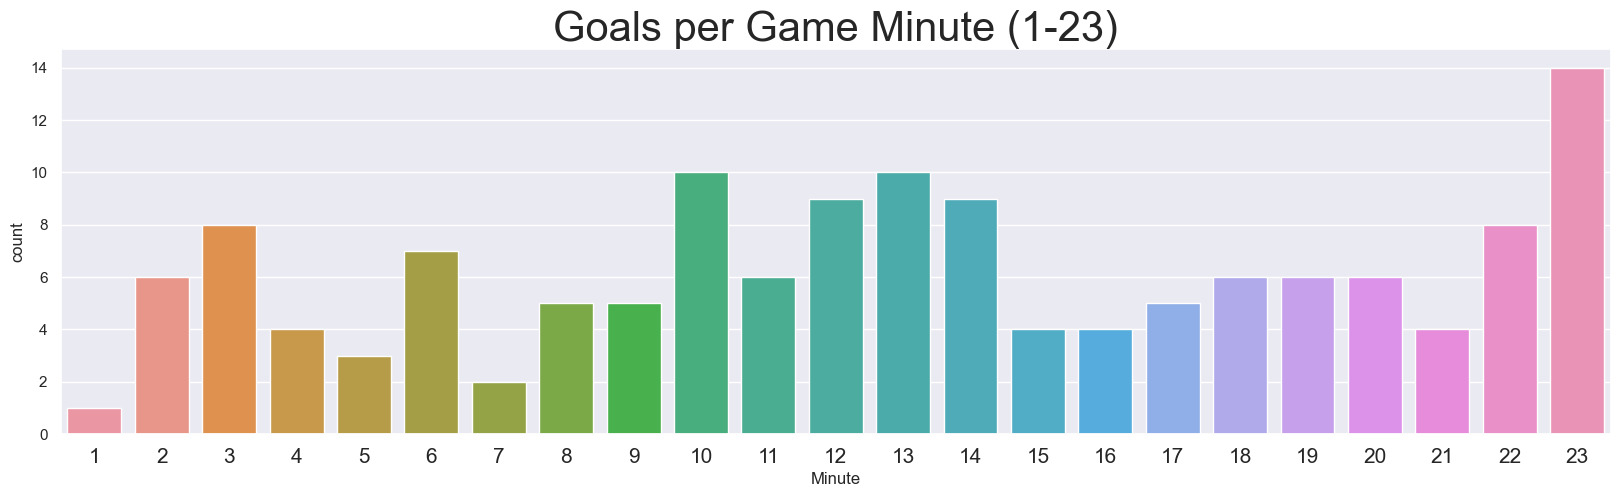

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-First Half Extra time)')

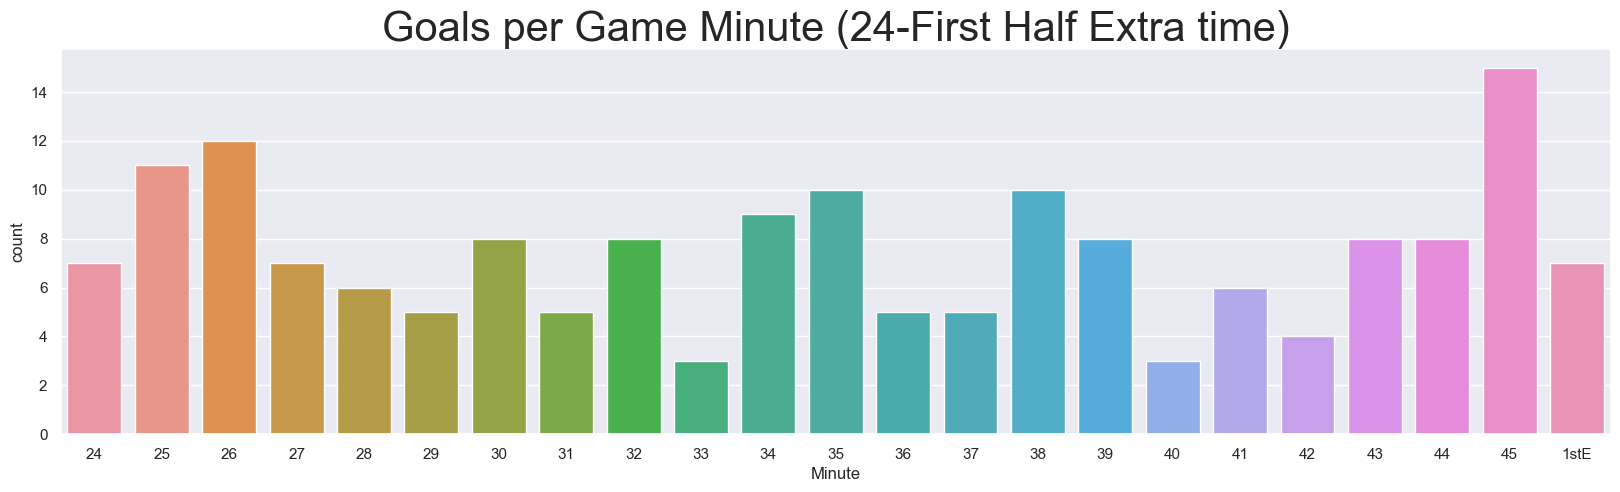

In [15]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-First Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

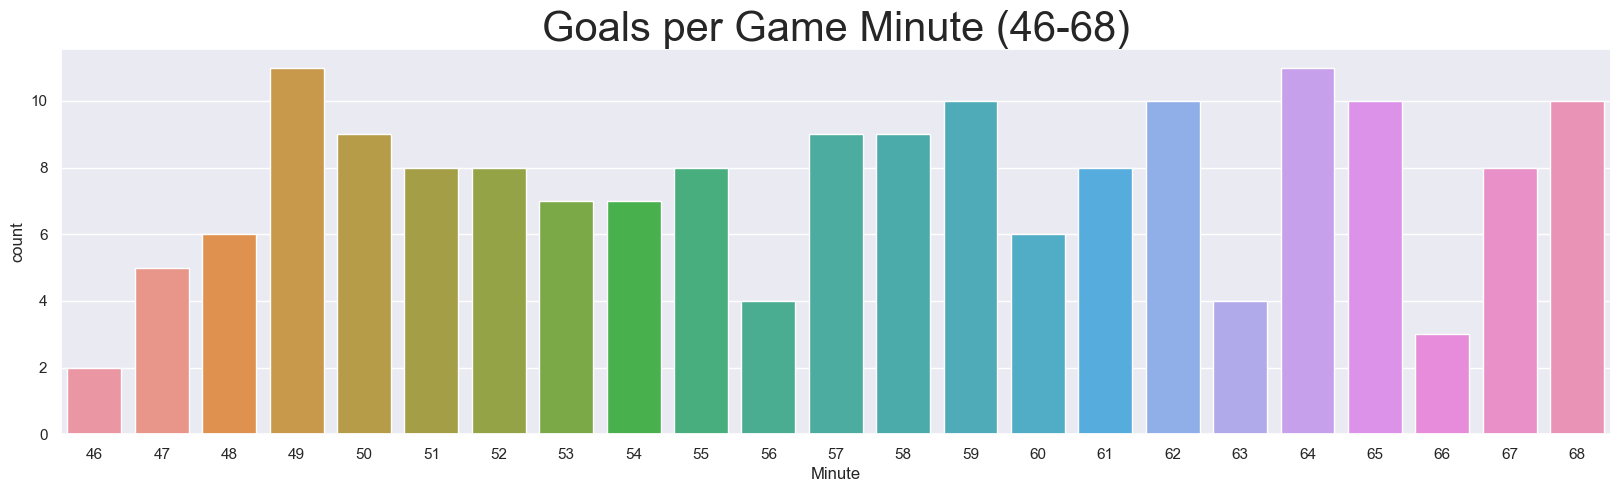

In [16]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute 69- 2nd Half Extra time)')

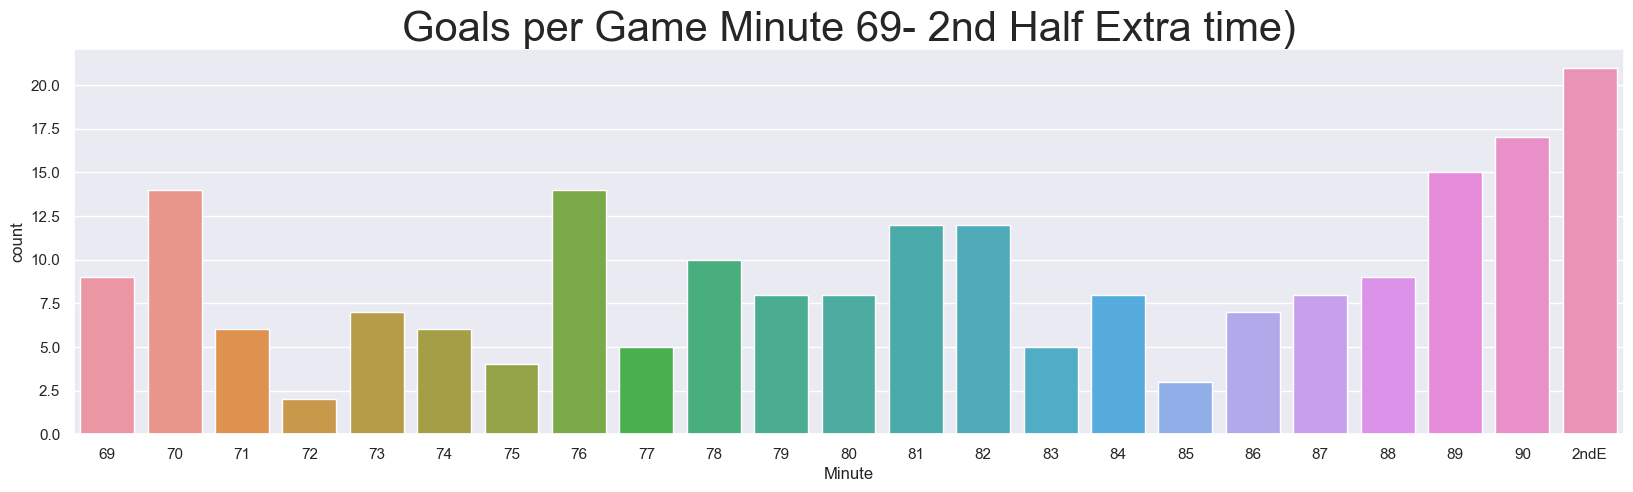

In [17]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 69- 2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

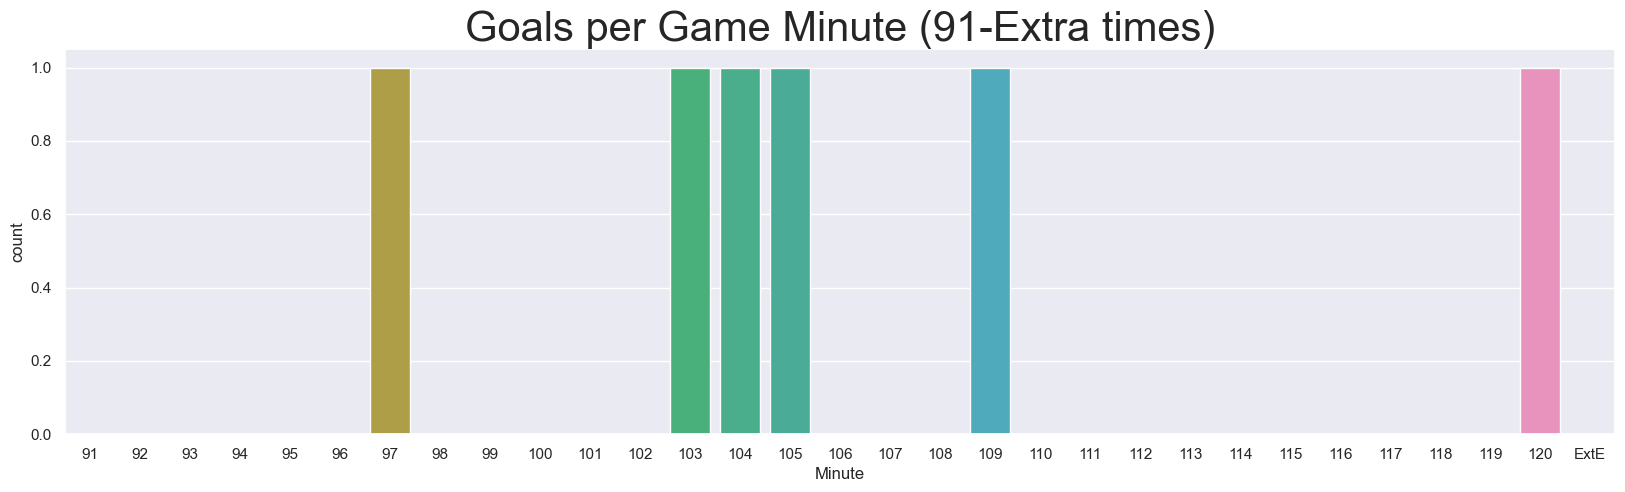

In [18]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

- He scored in all 90 game minutes!

## 4.6. Goals per Type_of_goal

In [19]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

## 4.7. Scoreline after goal

Text(0.5, 1.0, 'Scoresheet after scoring')

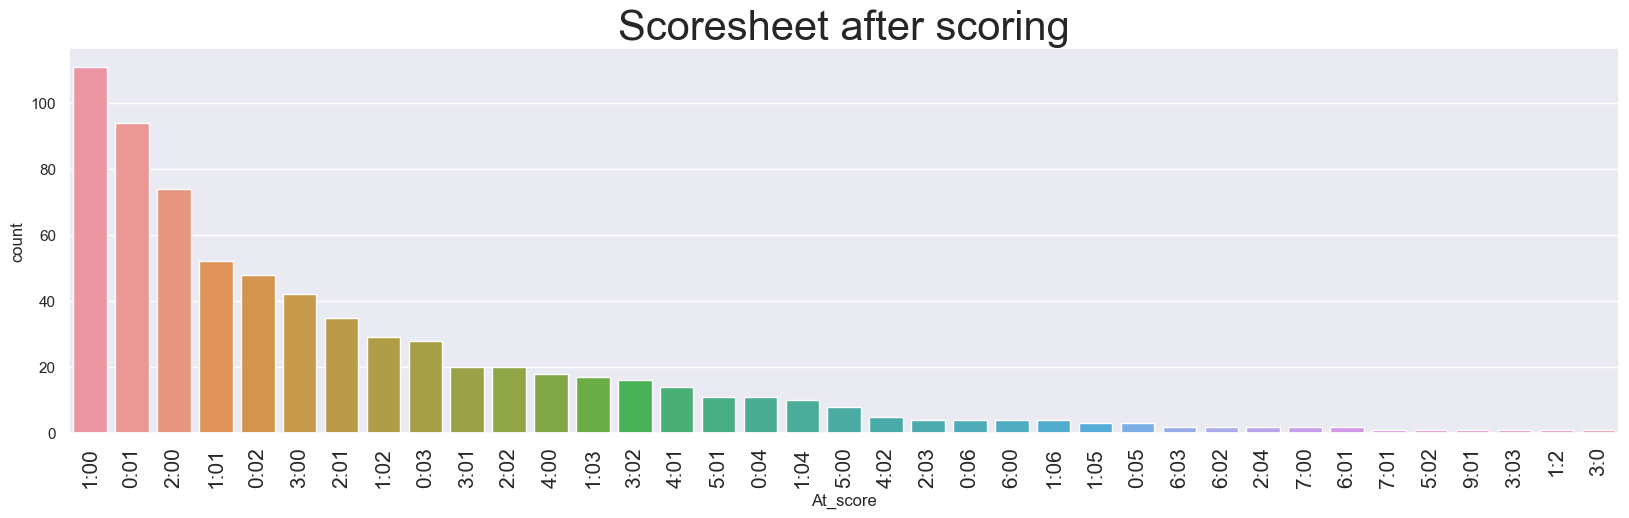

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

## 4.8. Opponents

Text(0.5, 1.0, 'Goals per Opponent')

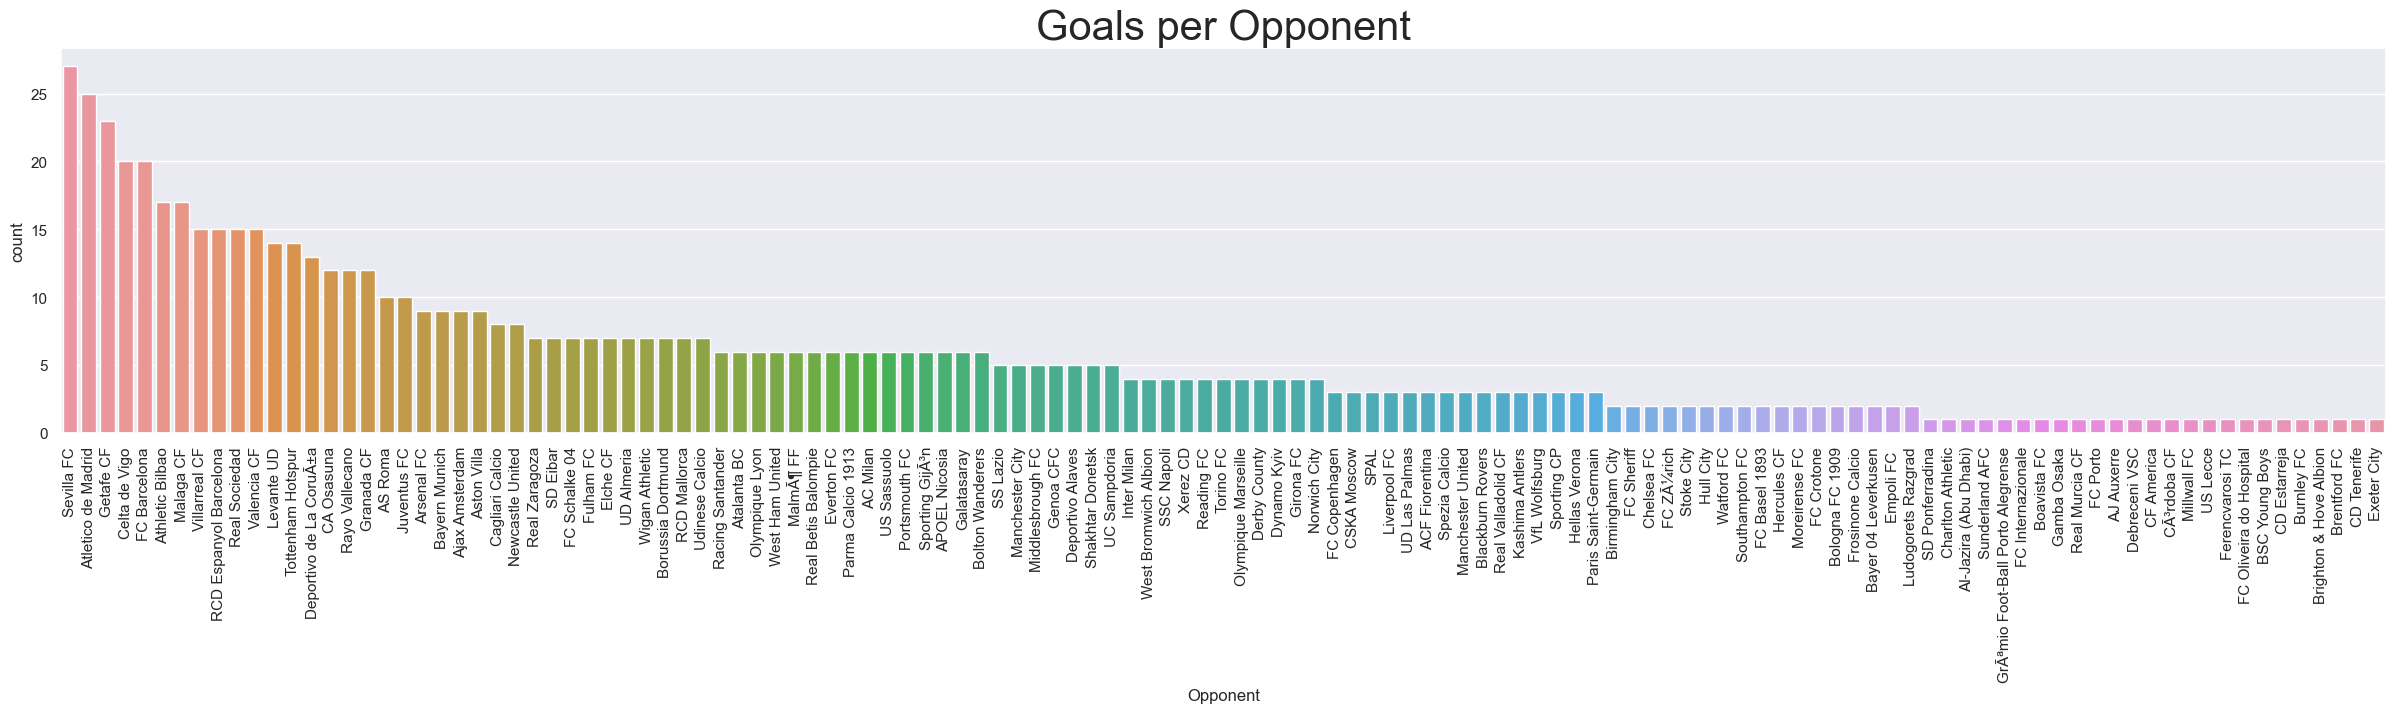

In [20]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

In [22]:
mins=list(map(str, df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df['Opponent']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals per Opponents')

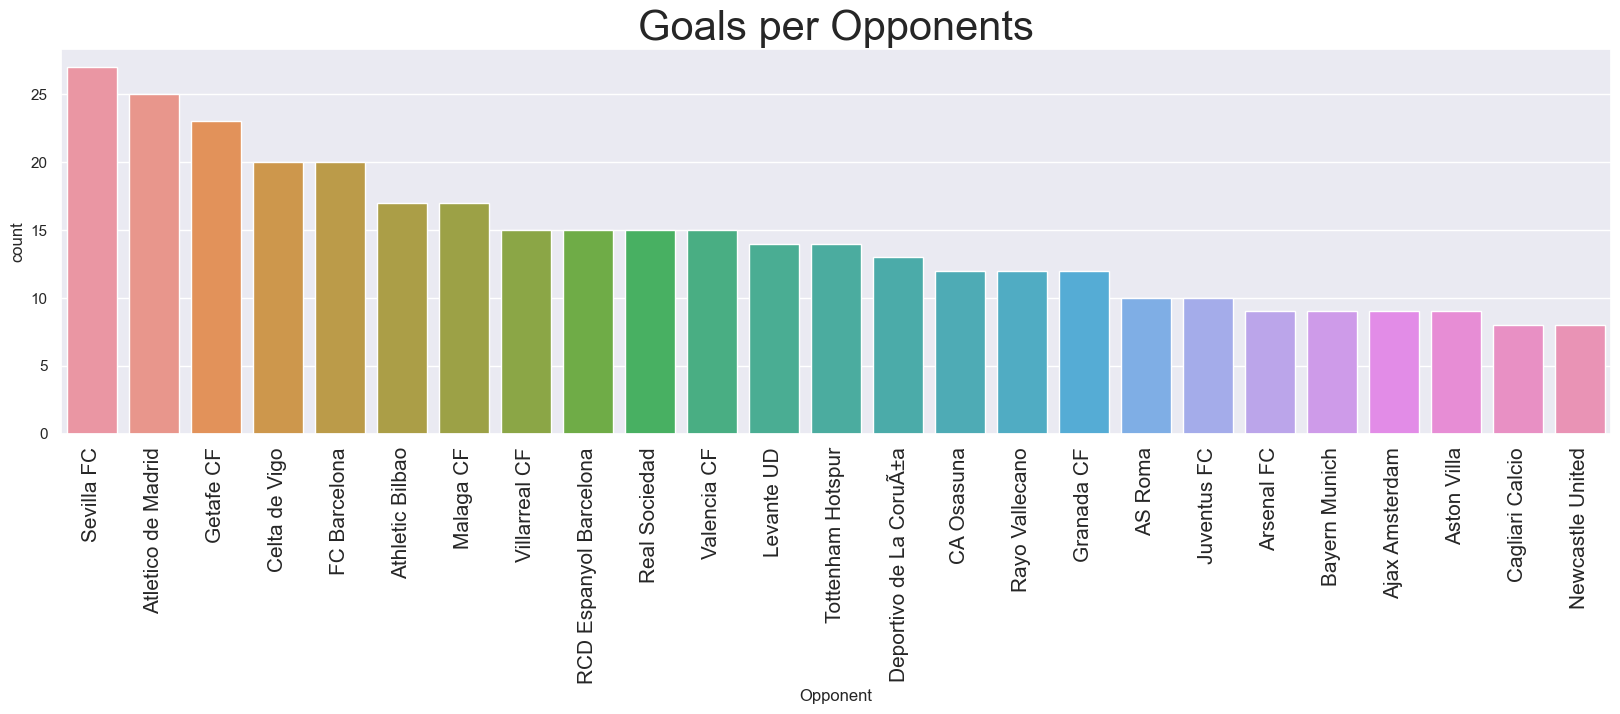

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

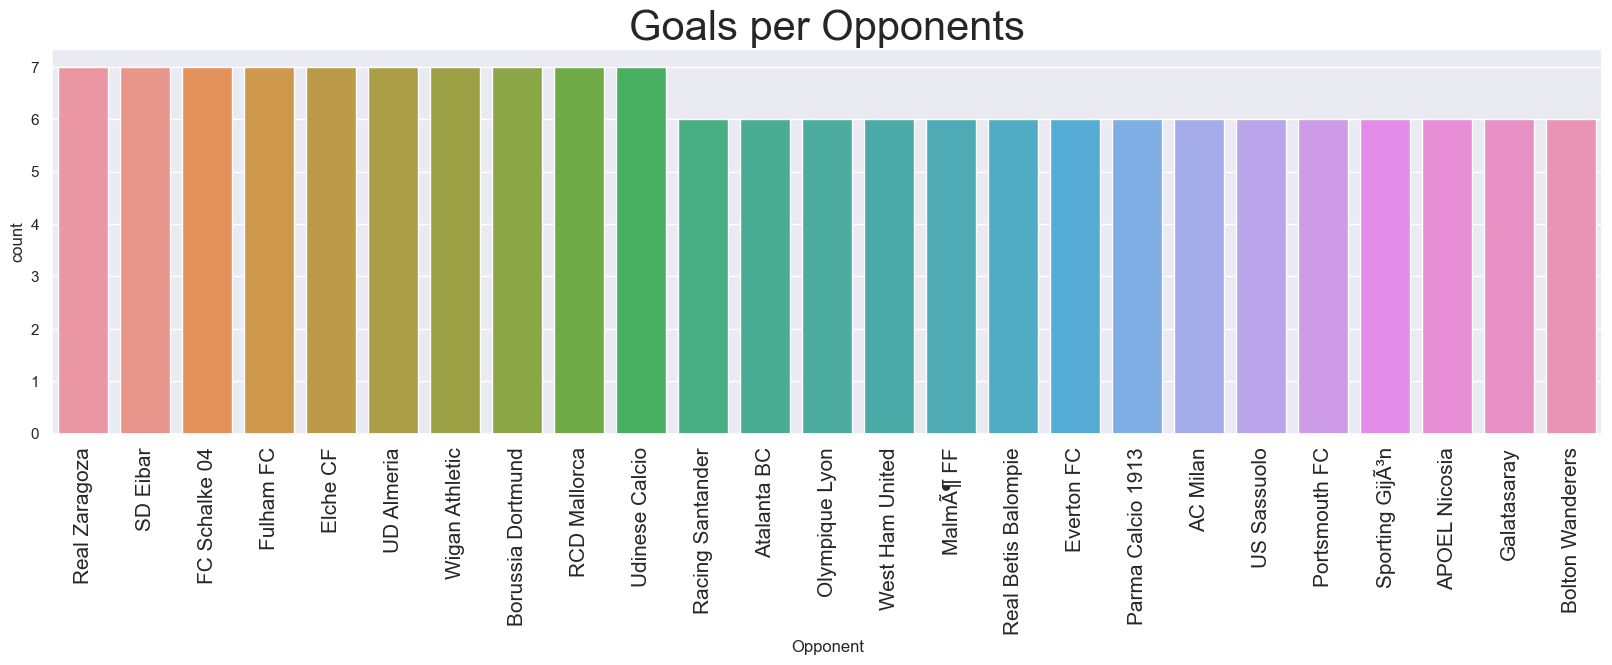

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

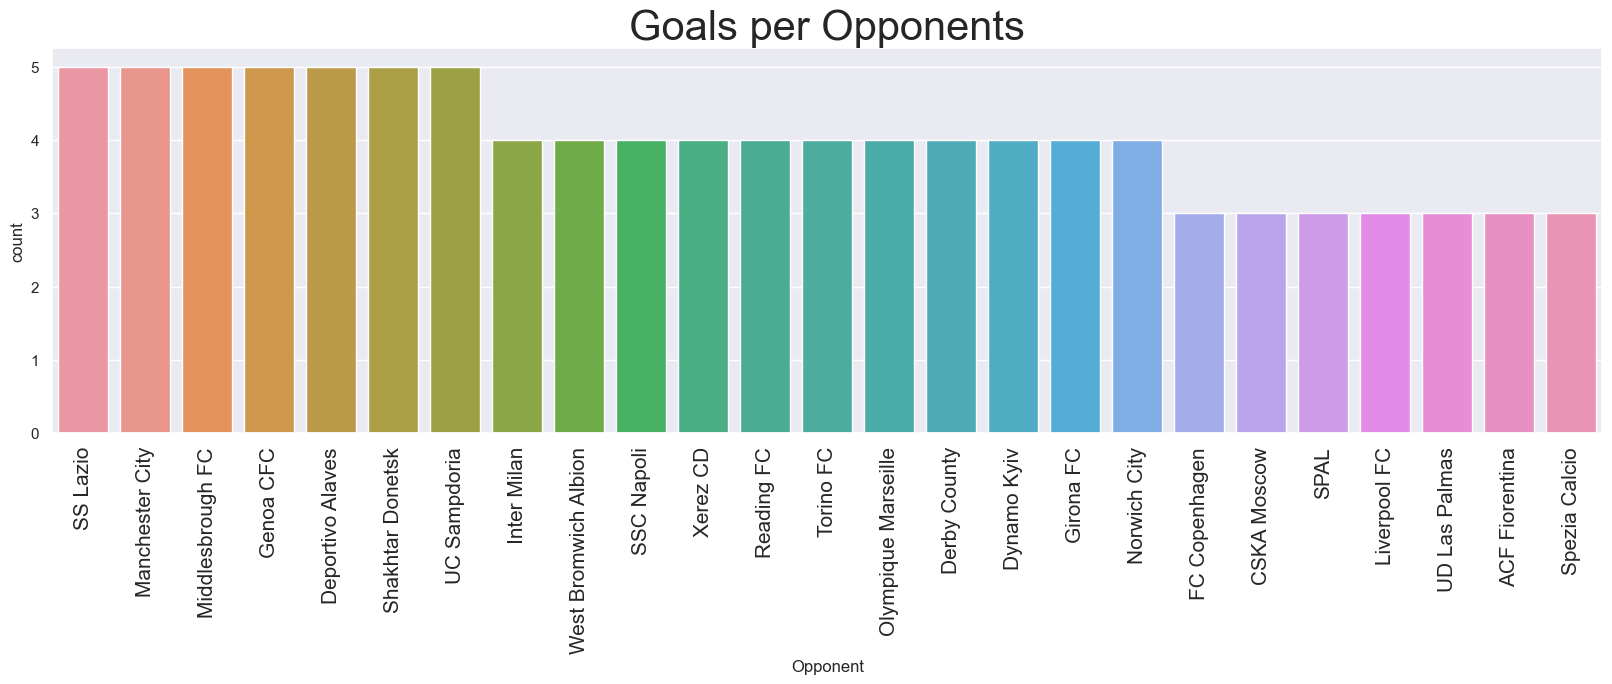

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

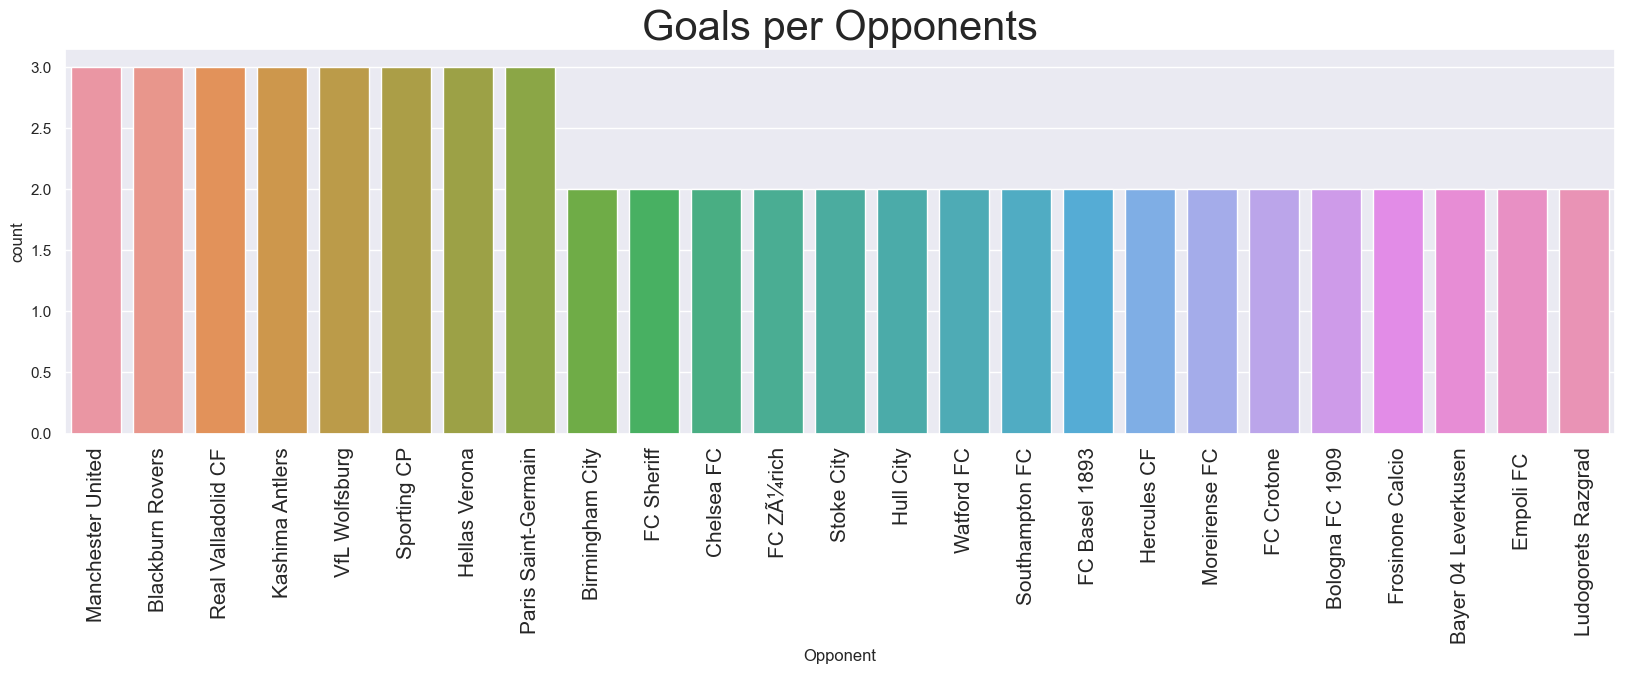

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

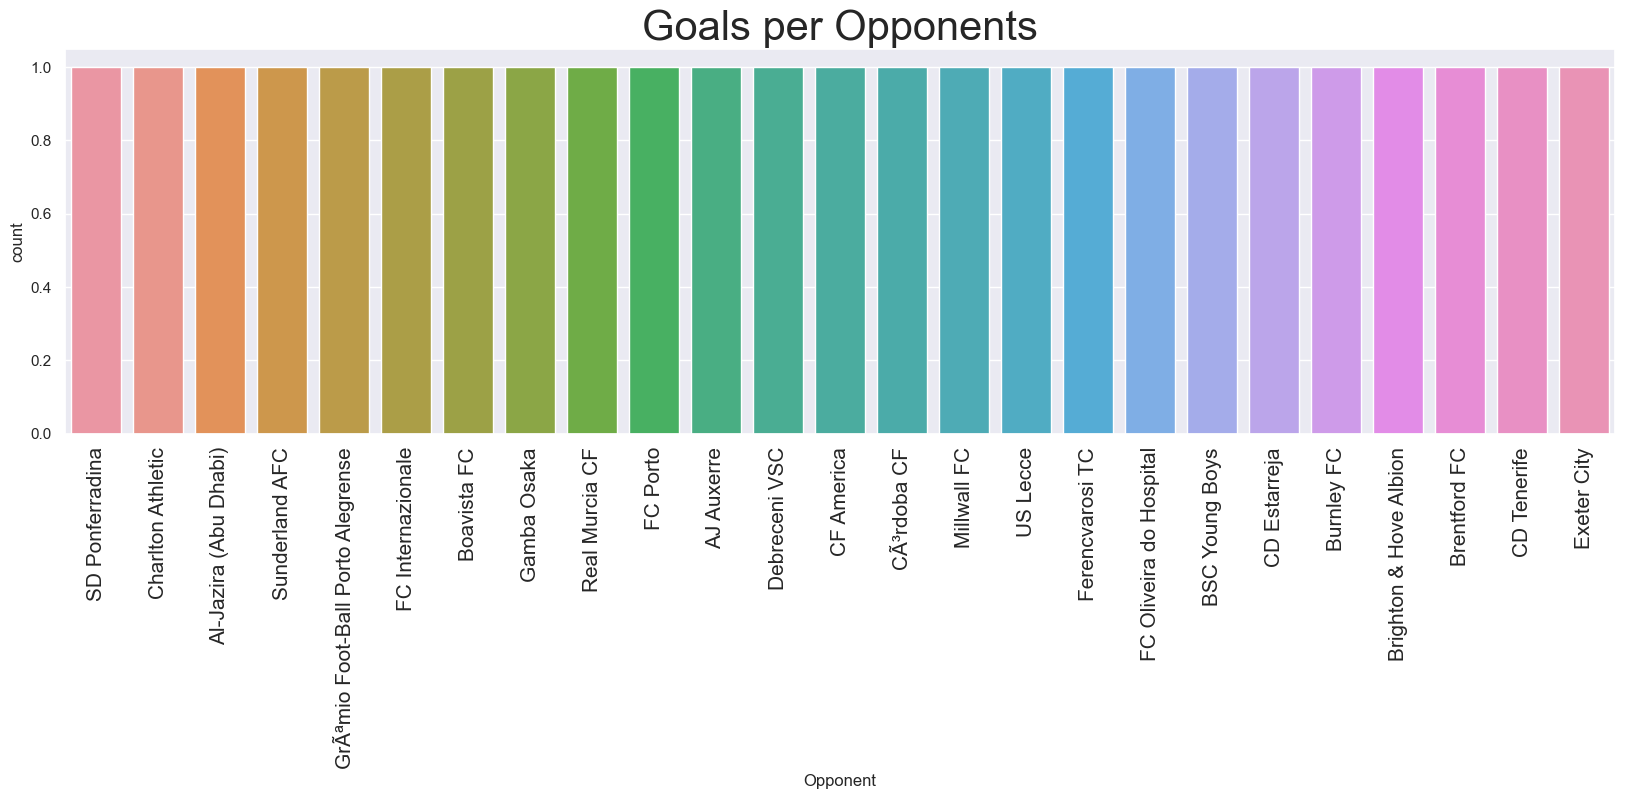

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins5)
p.axes.set_title("Goals per Opponents",fontsize=30)

## 4.9. Favourite Opponents

<BarContainer object of 7 artists>

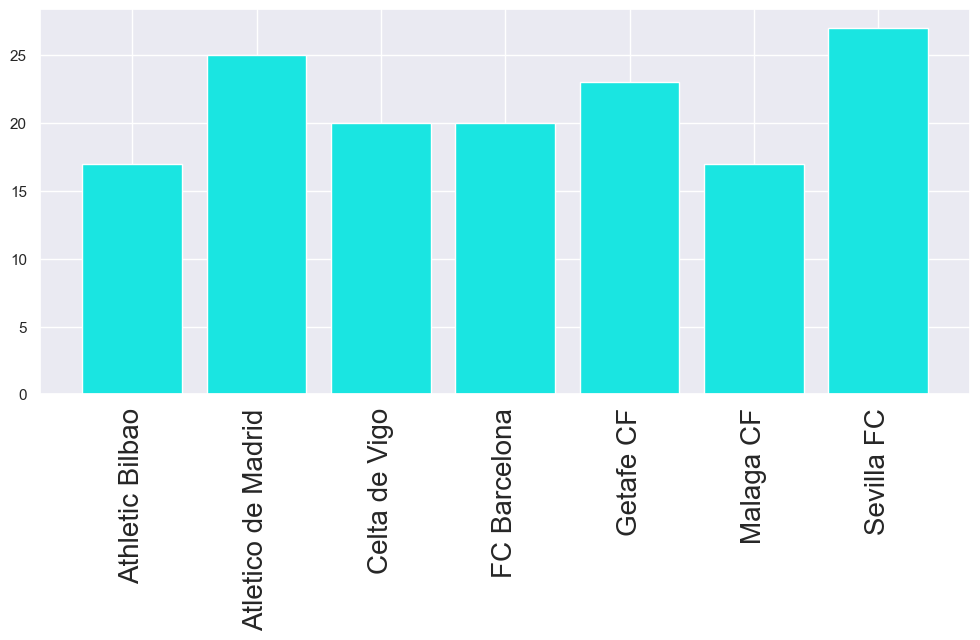

In [28]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

## 4.10. Assist

Text(0.5, 1.0, 'Goals Assist')

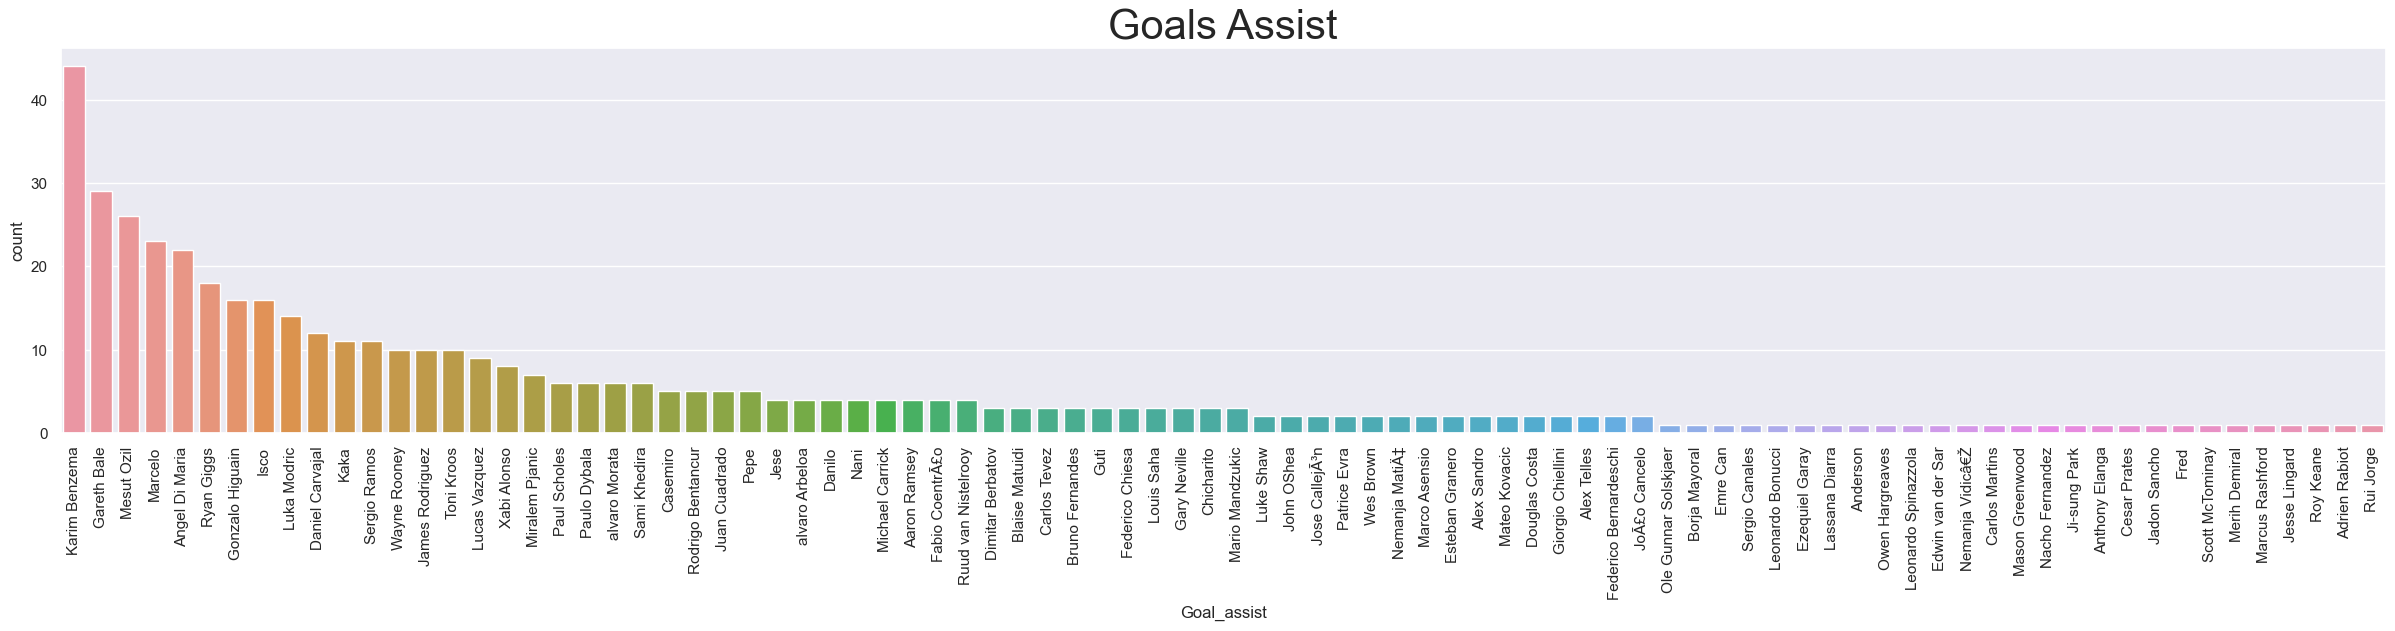

In [29]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

In [30]:
mins=list(map(str, df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals Assisted by')

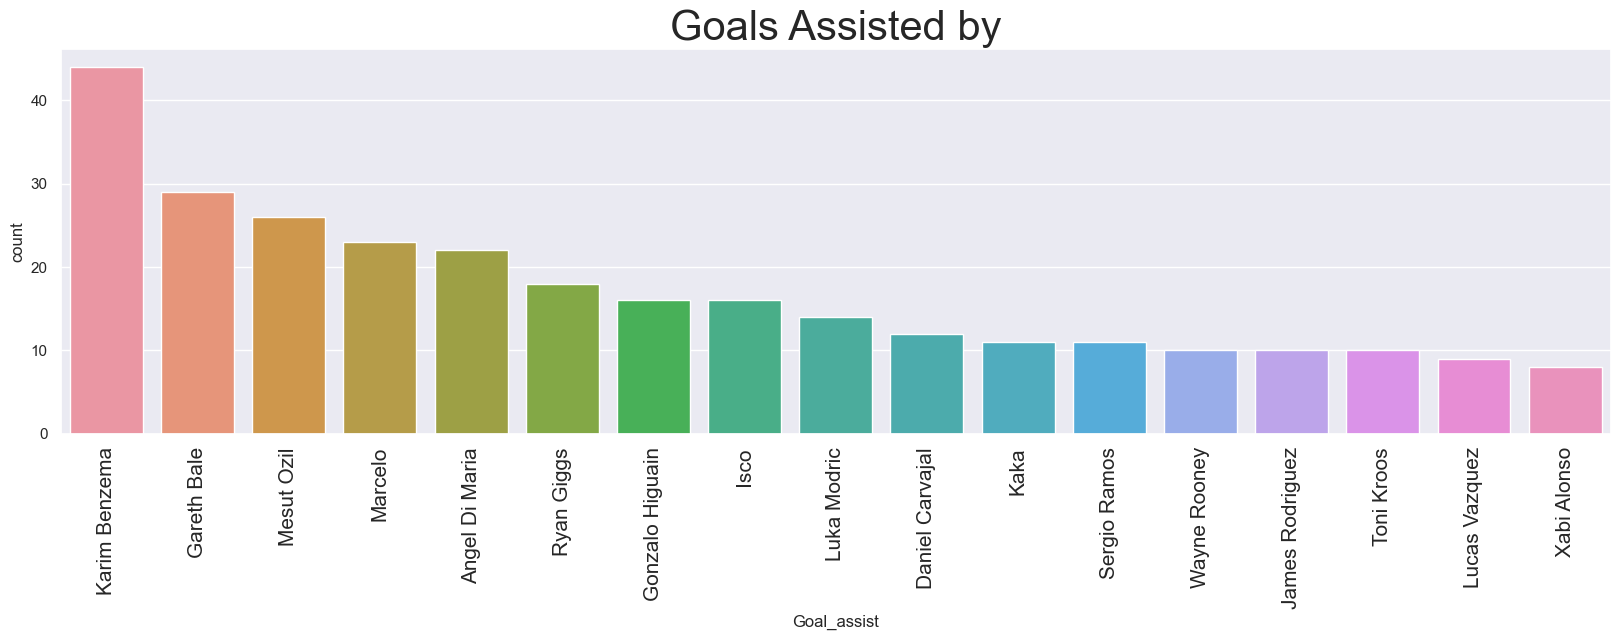

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins1)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

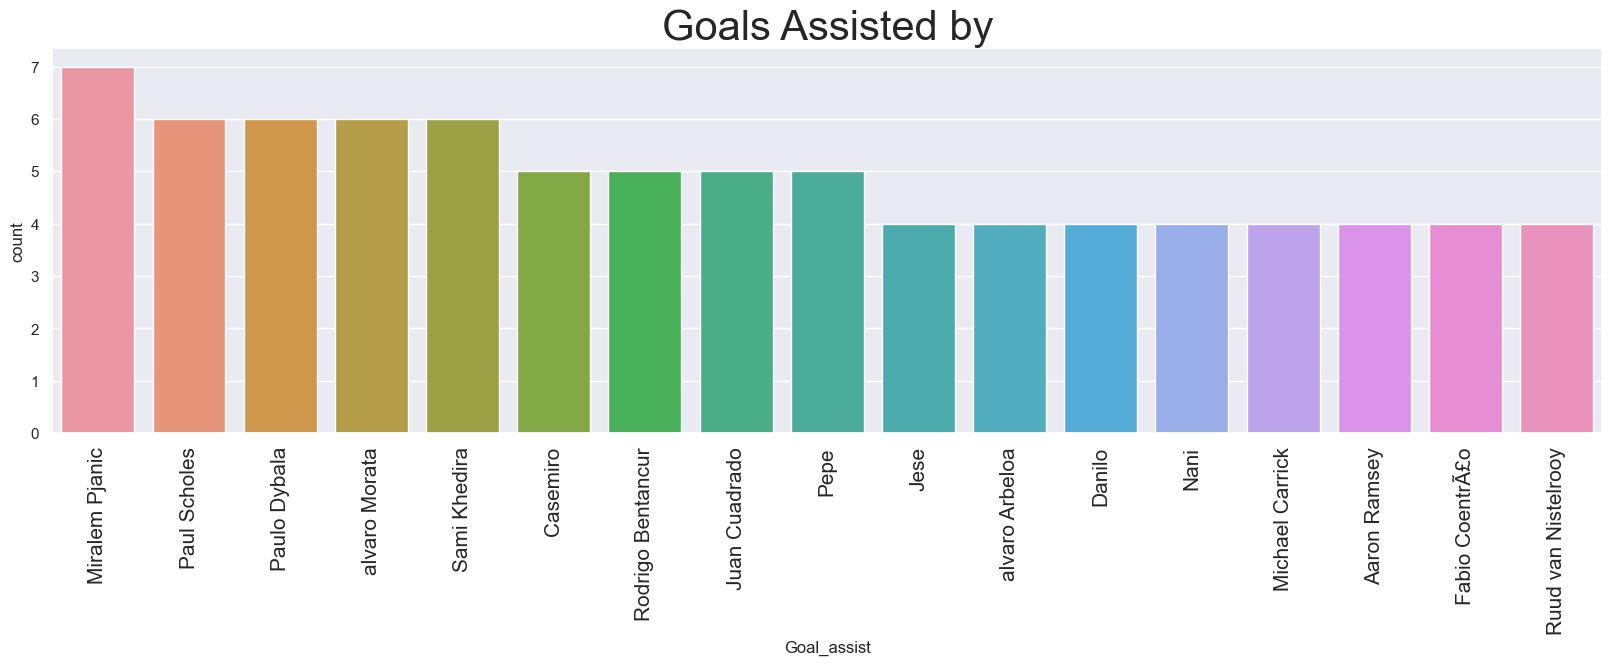

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins2)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

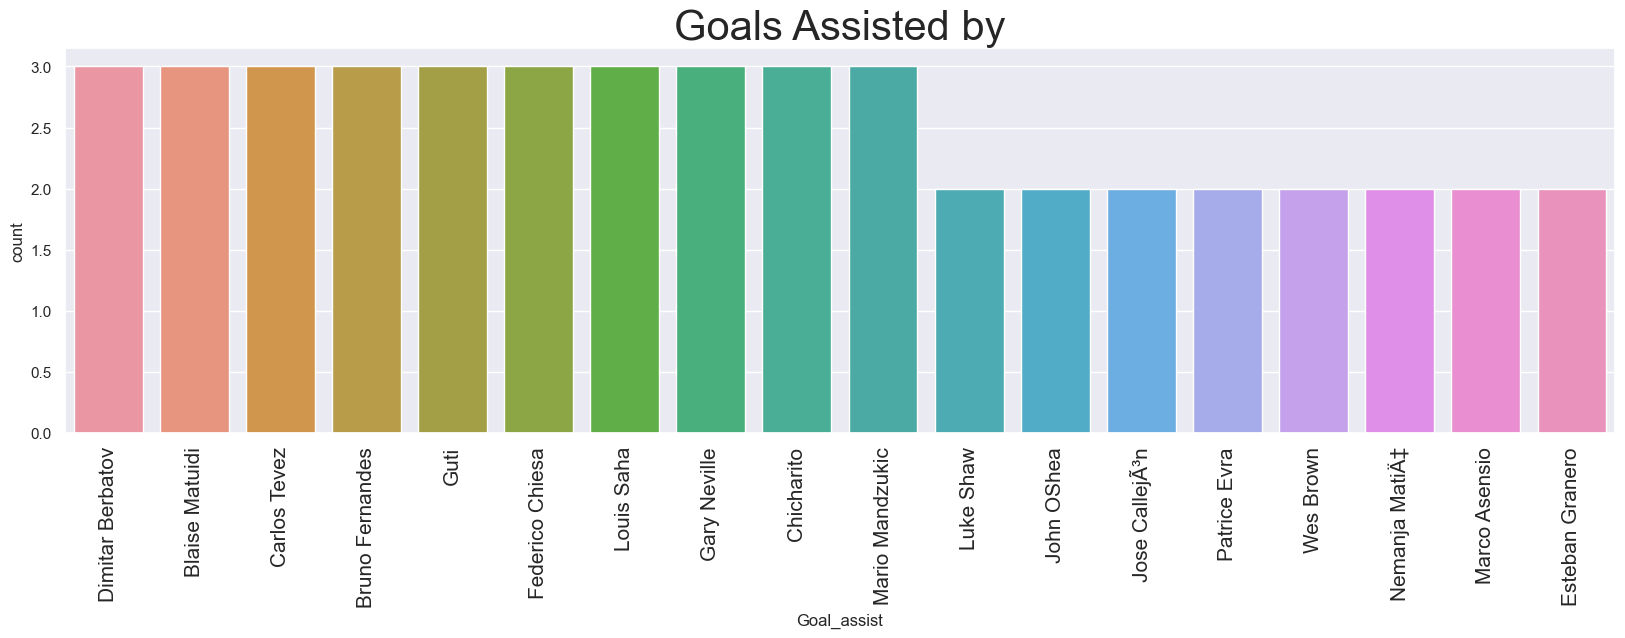

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins3)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

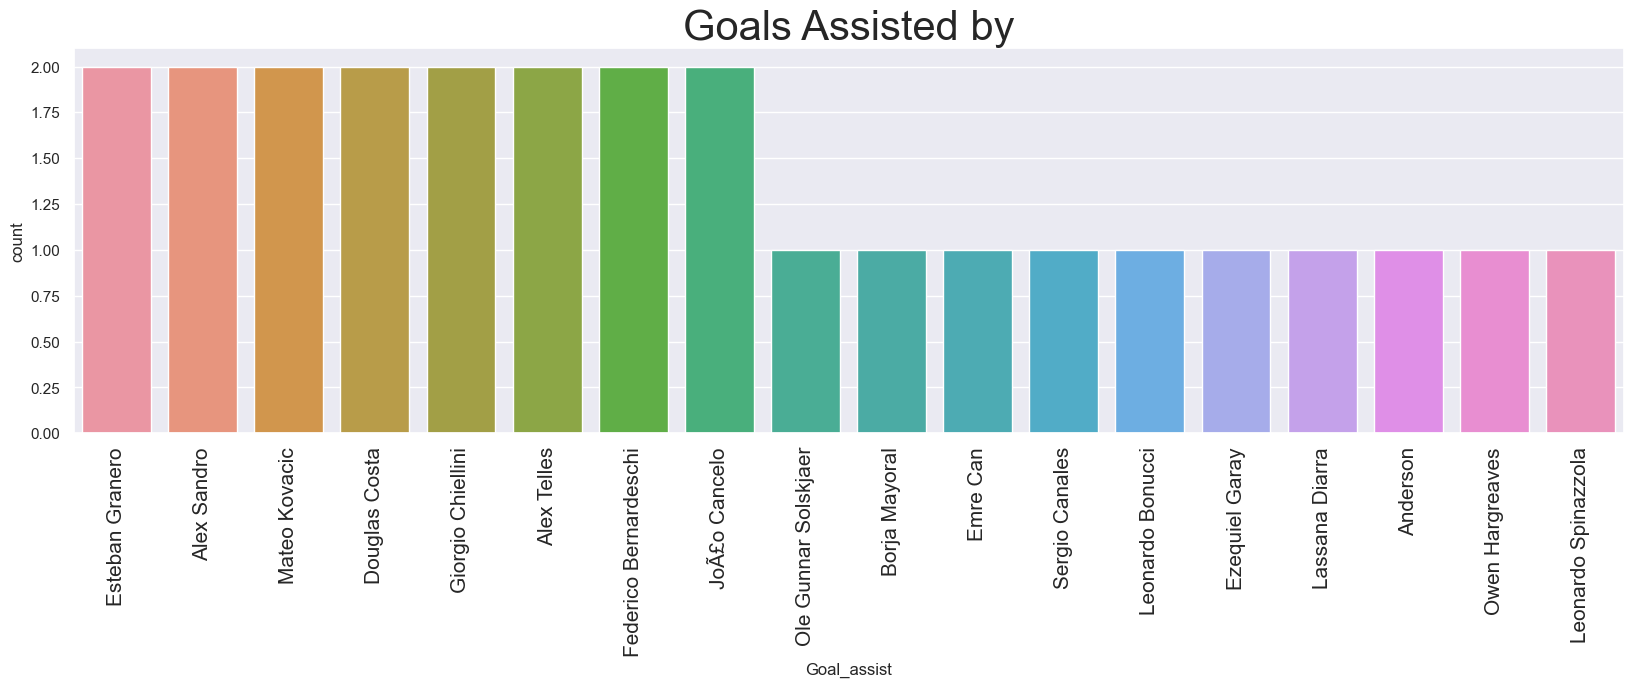

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins4)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

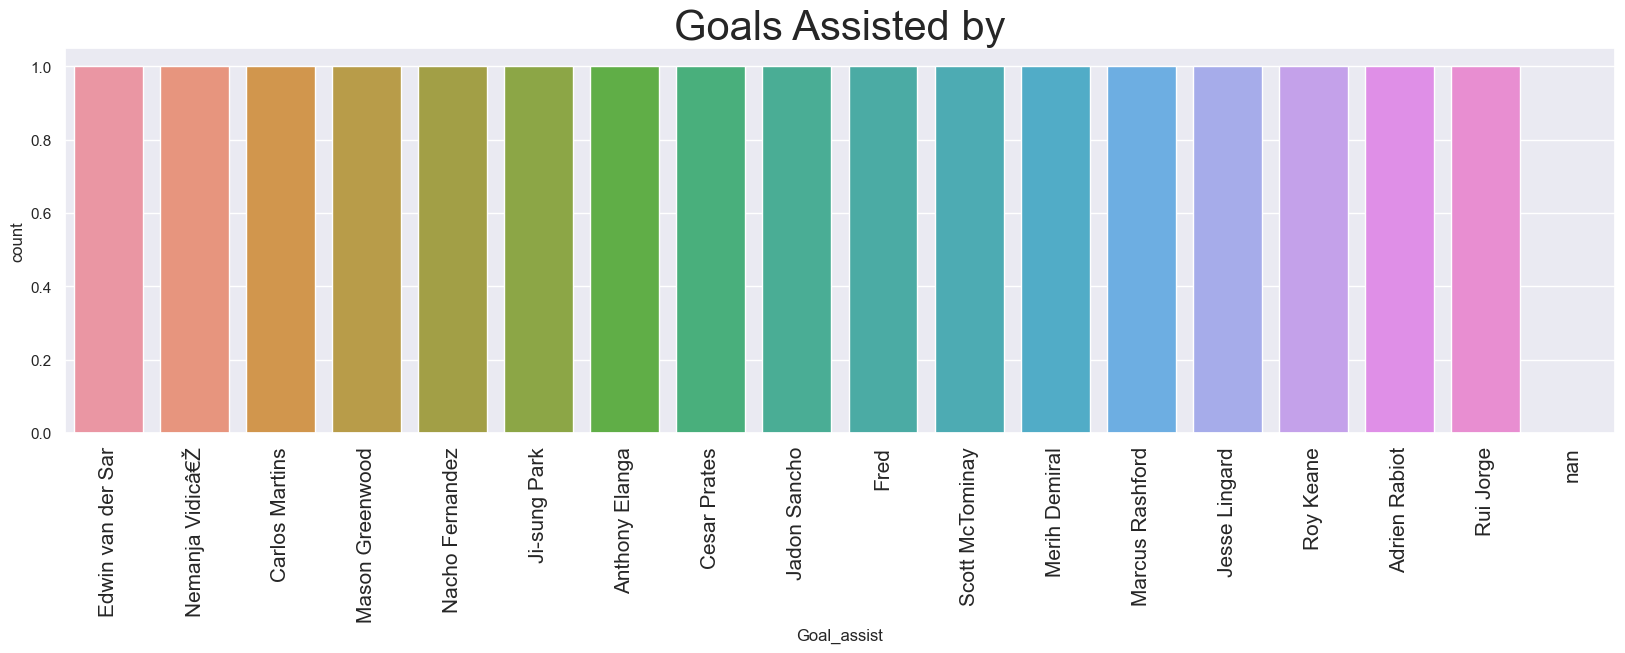

In [35]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins5)
p.axes.set_title("Goals Assisted by",fontsize=30)

## 4.11. Home - Away goals

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

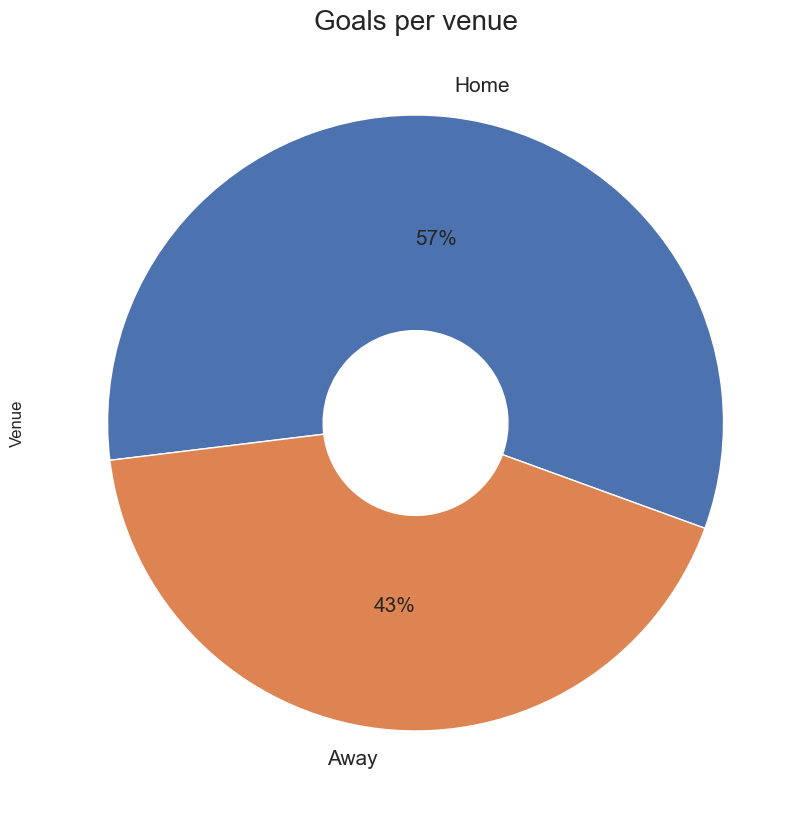

In [36]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})